# Lasso Regresyo
n
Hata kareleri toplamını minimalize eden katsayıalrı, katsayılara ceza uygulayrak bulmaktır

Ridge regresyon ile çok benziyor farkı:

ridge katsayıalrı sıfır yapmaz, Lasso katsayıları sıfır yapar bu yüzden değişken seçme işelmi yapmış olur

* Ridge regresyonunun ilgili ilgisiz tüm değişkenleri modelde bırakma dezavantajını giderir
* Lasso da katsayıalr sıfıra yaklaştırılır 
fakat L1 normu lambda yeterince büyük olduğunda bazı katsayıalrı sıfır yapar böylece değişken seçimi yapmış olur
* lambda nın(alpha da diyebilirsin) doğru seçilmesi çok önemlidir. bu seçim için cross validation işkemş kıullanılır
* Ridge ve Lasso yöntemeleri birbirinden üstün değildir 

# Ayar pametresinin belirlenmesi
* lambdanın sıfır olduğu yer EKK dır
* lambda için belirli değerleri içeren bir küme seçilir ve her birisi için cross validation test hatası hesaplanır
* En küçük cross validation test hatsı veren lambda ayar parametresi olarak seçilir
* son olarak seçilen bu lambda ile model yenşden tüm gözlemlerle fit edilir

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [4]:
hit=pd.read_csv("Hitters.csv")
df=hit.copy()
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","Division","League","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [6]:
lasso=Lasso(alpha=0.1).fit(X_train, y_train)

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.249e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [7]:
lasso.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/Users/necmiyesoyla/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

Text(0, 0.5, 'weights')

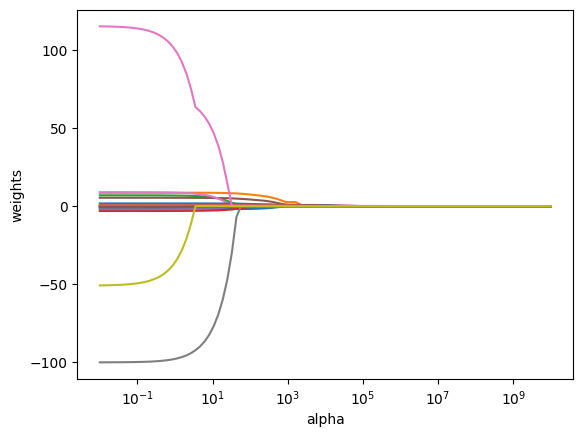

In [12]:
lasso=Lasso()
coef=[]
Lambdalar=10**np.linspace(10,-2,100)*0.5

for i in Lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    coef.append(lasso.coef_)

graph=plt.gca()
graph.plot(Lambdalar*2,coef)
graph.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights")
